In [1]:
import matplotlib.pyplot as plt
import torch
import norse
import numpy as np

norse.__version__

'1.0.0'

In [2]:
activation = norse.torch.LI()
activation

LI(p=LIParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.)), dt=0.001)

In [3]:
data = torch.zeros(1000,1)
data[20] =  1.0
data[100] = 1.0

voltage_trace, _ = activation(data)

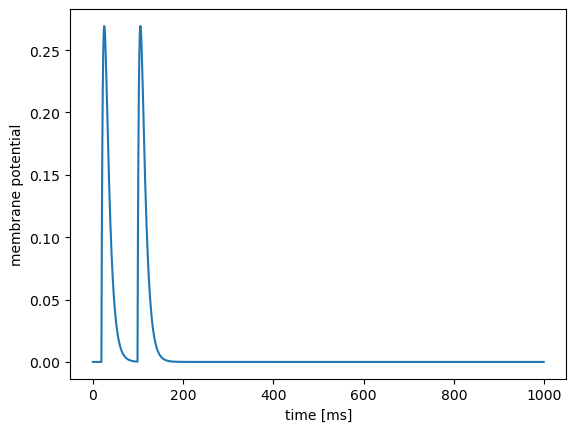

In [4]:
plt.xlabel('time [ms]')
plt.ylabel('membrane potential')
plt.plot(voltage_trace.detach())
#plt.axvline(20, color='red')
#plt.axvline(100, color='red')

In [5]:
from ipywidgets import interact, IntSlider, FloatSlider
from functools import partial
IntSlider = partial(IntSlider, continuous_update=False)
FloatSlider = partial(FloatSlider, continuous_update=False)


@interact(
    tau_mem=FloatSlider(min=10,max=200,step=1.0, value=10),
    tau_syn=FloatSlider(min=10,max=200,step=1.0, value=20),
    t0=IntSlider(min=0, max=1000, step=1, value=20),
    t1=IntSlider(min=0, max=1000, step=1, value=100),
)
def experiment(tau_mem, tau_syn, t0, t1):
    plt.figure()
    num_neurons = 1
    tau_mem_inv = torch.tensor([1/(tau_mem * 0.001)])
    tau_syn_inv = torch.tensor([1/(tau_syn * 0.001)])
    data = torch.zeros(1000,num_neurons)
    data[t0] =  1.0
    data[t1] = 1.0

    voltage_trace, _ = norse.torch.LI(p=norse.torch.LIParameters(tau_mem_inv=tau_mem_inv, tau_syn_inv=tau_syn_inv))(data)
    plt.xlabel('time [ms]')
    plt.ylabel('membrane potential')
    for i in range(num_neurons):
        plt.plot(voltage_trace.detach()[:,i])
    plt.axvline(t0, color='red', alpha=0.9)
    plt.axvline(t1, color='red', alpha=0.9)
    plt.show()

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='tau_mem', max=200.0, min=1…

In [6]:
def integrate_and_record_voltages(cell):
    def integrate(input_spike_train):
        T = input_spike_train.shape[0]
        s = None
        spikes = []
        voltage_trace = []
        for ts in range(T):
            z, s = cell(input_spike_train[ts], s)
            spikes.append(z)
            voltage_trace.append(s.v)
        return torch.stack(spikes), torch.stack(voltage_trace)
    return integrate

In [7]:
@interact(
    tau_mem=FloatSlider(min=10,max=200,step=1.0, value=40),
    tau_syn=FloatSlider(min=10,max=200,step=1.0, value=60),
    v_th=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.8),
    t0=IntSlider(min=0, max=1000, step=1, value=85),
    t1=IntSlider(min=0, max=1000, step=1, value=150),
)
def experiment(tau_mem, tau_syn, v_th, t0, t1):
    plt.figure()
    num_neurons = 1
    tau_syn_inv = torch.tensor([1/(tau_syn * 0.001)])
    tau_mem_inv = torch.tensor([1/(tau_mem * 0.001)])
    data = torch.zeros(1000,num_neurons)
    data[20] = 1.0
    data[t0] = 1.0
    data[t1] = 1.0

    cell = norse.torch.LIFCell(p=norse.torch.LIFParameters(tau_mem_inv=tau_mem_inv, tau_syn_inv=tau_syn_inv, v_th=torch.as_tensor(v_th)))
    lif_integrate = integrate_and_record_voltages(cell)

    voltage_trace, _ = norse.torch.LI(p=norse.torch.LIParameters(tau_mem_inv=tau_mem_inv, tau_syn_inv=tau_syn_inv))(data)
    zs, lif_voltage_trace = lif_integrate(data)
    plt.xlabel('time [ms]')
    plt.ylabel('membrane potential')
    plt.plot(voltage_trace.detach(), label="LI")
    plt.plot(lif_voltage_trace.detach(), label="LIF")
    plt.axhline(v_th, color='grey')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=40.0, continuous_update=False, description='tau_mem', max=200.0, min=1…

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>